In [2]:
pip -v


Usage:   
  C:\Users\User\anaconda3\python.exe -m pip <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper command used for command completion.
  debug                       Show information useful for debugging.
  

In [7]:
from wavescapes import *
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
penta_reductions = glob('./reductions/penta/*.mid')
dia_reductions = glob('./reductions/diatonic/*.mid')

In [87]:
# phase in 5th decide the tonic of the penta/dia
# classify based on [5th (deside the phase of others)],[2nd, 4th, 6th] sign of phase
tag = {} # eg. {'CM':([1.234],[1,1,-1])}
scales={
    'CM':([1,0,1,0,1,1,0,1,0,1,0,1], [0]),
    'GM':([1,0,1,0,1,0,1,1,0,1,0,1], [0]),
    'DM':([0,1,1,0,1,0,1,1,0,1,0,1], [0]),
    'AM':([0,1,1,0,1,0,1,0,1,1,0,1], [0]),
    'EM':([0,1,0,1,1,0,1,0,1,1,0,1], [0]),
    'BM':([0,1,0,1,1,0,1,0,1,0,1,1], [0]),
    'FsM':([0,1,0,1,0,1,1,0,1,0,1,1], [0]),
    'Cs':([1,1,0,1,0,1,1,0,1,0,1,0], [0]),
    'AbM':([1,1,0,1,0,1,0,1,1,0,1,0], [0]),
    'EbM':([1,0,1,1,0,1,0,1,1,0,1,0], [0]),
    'BbM':([1,0,1,1,0,1,0,1,0,1,1,0], [0]),
    'FM':([1,0,1,0,1,1,0,1,0,1,1,0], [0]),
    
     'CPe': ([1,0,1,0,1,0,0,1,0,1,0,0], [0]),
     'GPe': ([0,0,1,0,1,0,0,1,0,1,0,1], [0]),
     'DPe': ([0,0,1,0,1,0,1,0,0,1,0,1], [0]),
     'APe': ([0,1,0,0,1,0,1,0,0,1,0,1], [0]),
     'EPe': ([0,1,0,0,1,0,1,0,1,0,0,1], [0]),
     'BPe': ([0,1,0,1,0,0,1,0,1,0,0,1], [0]),
      'FsPe': ([0,1,0,1,0,0,1,0,1,0,1,0], [0]),
      'CsPe': ([0,1,0,1,0,1,0,0,1,0,1,0], [0]),
      'AbPe': ([1,0,0,1,0,1,0,0,1,0,1,0], [0]),
      'EbPe': ([1,0,0,1,0,1,0,1,0,0,1,0], [0]),
      'BbPe': ([1,0,1,0,0,1,0,1,0,0,1,0], [0]),
     'FPe': ([1,0,1,0,0,1,0,1,0,1,0,0], [0])
}

In [88]:
for key in scales.items():
    fourier_mat = apply_dft_to_pitch_class_matrix([key[1][0]])
    top_coefficients = fourier_mat[fourier_mat.shape[0]-1][fourier_mat.shape[1]-1][1:]
    phase = np.angle(top_coefficients)
    tag[key[0]] = (phase[4],[np.sign(phase[1]),np.sign(phase[3]),np.sign(phase[5])])

In [89]:
tag #based on sign of phase of the three coefficients, there are scales with the same vector....

{'CM': (1.0471975511965979, [1.0, 1.0, -1.0]),
 'GM': (1.5707963267948966, [0.0, 0.0, 0.0]),
 'DM': (2.0943951023931953, [-1.0, -1.0, 1.0]),
 'AM': (2.6179938779914944, [-1.0, 1.0, 1.0]),
 'EM': (3.141592653589793, [1.0, 0.0, 1.0]),
 'BM': (-2.6179938779914944, [1.0, -1.0, -1.0]),
 'FsM': (-2.0943951023931953, [1.0, 1.0, -1.0]),
 'Cs': (-1.5707963267948966, [0.0, 0.0, 0.0]),
 'AbM': (-1.0471975511965979, [-1.0, -1.0, 1.0]),
 'EbM': (-0.5235987755982988, [-1.0, 1.0, 1.0]),
 'BbM': (0.0, [1.0, 0.0, 1.0]),
 'FM': (0.5235987755982988, [1.0, -1.0, -1.0]),
 'CPe': (1.0471975511965979, [-1.0, -1.0, 1.0]),
 'GPe': (1.5707963267948966, [1.0, 1.0, 1.0]),
 'DPe': (2.0943951023931953, [1.0, 1.0, -1.0]),
 'APe': (2.6179938779914944, [1.0, -1.0, -1.0]),
 'EPe': (3.141592653589793, [0.0, 1.0, 0.0]),
 'BPe': (-2.6179938779914944, [-1.0, 1.0, 1.0]),
 'FsPe': (-2.0943951023931953, [-1.0, -1.0, 1.0]),
 'CsPe': (-1.5707963267948966, [1.0, 1.0, 1.0]),
 'AbPe': (-1.0471975511965979, [1.0, 1.0, -1.0]),
 'EbP

In [98]:
phase5_tag = [values[0] for values in tag.values()]
sign_tag = [values[1] for values in tag.values()]

In [97]:
from scipy.spatial import distance

In [114]:
# testing
dia_penta = {0:"Diatonic",1:"Pentatonic"}
for penta in penta_reductions:
    candidates = [] # candidate scales for current piece
    full = produce_pitch_class_matrix_from_filename(penta, aw_size=1)
    fourier_mat = apply_dft_to_pitch_class_matrix(full)
    top_coefficients = fourier_mat[fourier_mat.shape[0]-1][fourier_mat.shape[1]-1][1:]
    
    phase = np.angle(top_coefficients)
    
    phase5 = phase[4]
    interested_phase_sign = np.array([np.sign(phase[1]),np.sign(phase[3]),np.sign(phase[5])])
    
    # check phase in 5th coefficient and narrow down to penta/dia
    print(phase5, interested_phase_sign)
    ind = np.argmin(np.abs(phase5-np.array(phase5_tag)[0:12])) # index of the diatonic, +12 -> index of pentatonic
    candidates.append(distance.euclidean(interested_phase_sign, sign_tag[ind]))
    candidates.append(distance.euclidean(interested_phase_sign, sign_tag[ind+12]))
    
    if(np.argmin(candidates)==1):
        ind += 12
    
    print(penta, "is", dia_penta[np.argmin(candidates)], "and corresponding scale is", list(tag)[ind])


0.40499739713580596 [-1. -1.  1.]
./reductions/penta\cathedralBbpenta.mid is Pentatonic and corresponding scale is FPe
-2.601621359094327 [-1.  1.  1.]
./reductions/penta\cathedralBmajpenta.mid is Pentatonic and corresponding scale is BPe
1.0973536989246142 [-1. -1.  1.]
./reductions/penta\cathedralGpenta.mid is Pentatonic and corresponding scale is CPe
-2.8910567977884774 [ 1.  1. -1.]
./reductions/penta\pagodesBmajpenta.mid is Diatonic and corresponding scale is BM
-1.0891505960544001 [ 1. -1. -1.]
./reductions/penta\prelude5Abpenta.mid is Pentatonic and corresponding scale is AbPe
-1.3105535290168078 [-1. -1.  1.]
./reductions/penta\prelude5Ebpenta.mid is Diatonic and corresponding scale is Cs
-2.1996937224809376 [-1. -1.  1.]
./reductions/penta\Prélude VIIIpenta.mid is Pentatonic and corresponding scale is FsPe
-2.637649778019831 [-1. -1.  1.]
./reductions/penta\Prélude VIIIpenta1.mid is Pentatonic and corresponding scale is BPe
-1.1081244669296244 [ 1. -1. -1.]
./reductions/penta\

In [115]:
# testing
dia_penta = {0:"Diatonic",1:"Pentatonic"}
for dia in dia_reductions:
    candidates = [] # candidate scales for current piece
    full = produce_pitch_class_matrix_from_filename(dia, aw_size=1)
    fourier_mat = apply_dft_to_pitch_class_matrix(full)
    top_coefficients = fourier_mat[fourier_mat.shape[0]-1][fourier_mat.shape[1]-1][1:]
    
    phase = np.angle(top_coefficients)
    
    phase5 = phase[4]
    interested_phase_sign = np.array([np.sign(phase[1]),np.sign(phase[3]),np.sign(phase[5])])
    
    # check phase in 5th coefficient and narrow down to penta/dia
    print(phase5, interested_phase_sign)
    ind = np.argmin(np.abs(phase5-np.array(phase5_tag)[0:12])) # index of the diatonic, +12 -> index of pentatonic
    candidates.append(distance.euclidean(interested_phase_sign, sign_tag[ind]))
    candidates.append(distance.euclidean(interested_phase_sign, sign_tag[ind+12]))
    
    if(np.argmin(candidates)==1):
        ind += 12
    
    print(dia, "is", dia_penta[np.argmin(candidates)], "and corresponding scale is", list(tag)[ind])


-2.96813346578815 [-1. -1.  1.]
./reductions/diatonic\bergpassepiedcodaF#dorian.mid is Pentatonic and corresponding scale is BPe
1.3974761432645773 [ 1. -1. -1.]
./reductions/diatonic\bergprelude20Amin.mid is Diatonic and corresponding scale is GM
-2.1216702928259887 [-1.  1.  1.]
./reductions/diatonic\cathedralG#aeolian.mid is Pentatonic and corresponding scale is FsPe
-2.6021501936706515 [-1.  1.  1.]
./reductions/diatonic\cathedralG#phrygian.mid is Pentatonic and corresponding scale is BPe
0.8308062163041433 [ 1. -1. -1.]
./reductions/diatonic\cathedralplaningCmaj.mid is Diatonic and corresponding scale is CM
0.7646020729073607 [ 1. -1. -1.]
./reductions/diatonic\childrens_corner_1cmaj.mid is Diatonic and corresponding scale is FM
-2.4753332738393903 [-1. -1.  1.]
./reductions/diatonic\estamp2_109.mid is Pentatonic and corresponding scale is BPe
1.8244286632809115 [ 1. -1. -1.]
./reductions/diatonic\estampes2_66.mid is Diatonic and corresponding scale is GM
-0.8824654844232777 [ 1. 

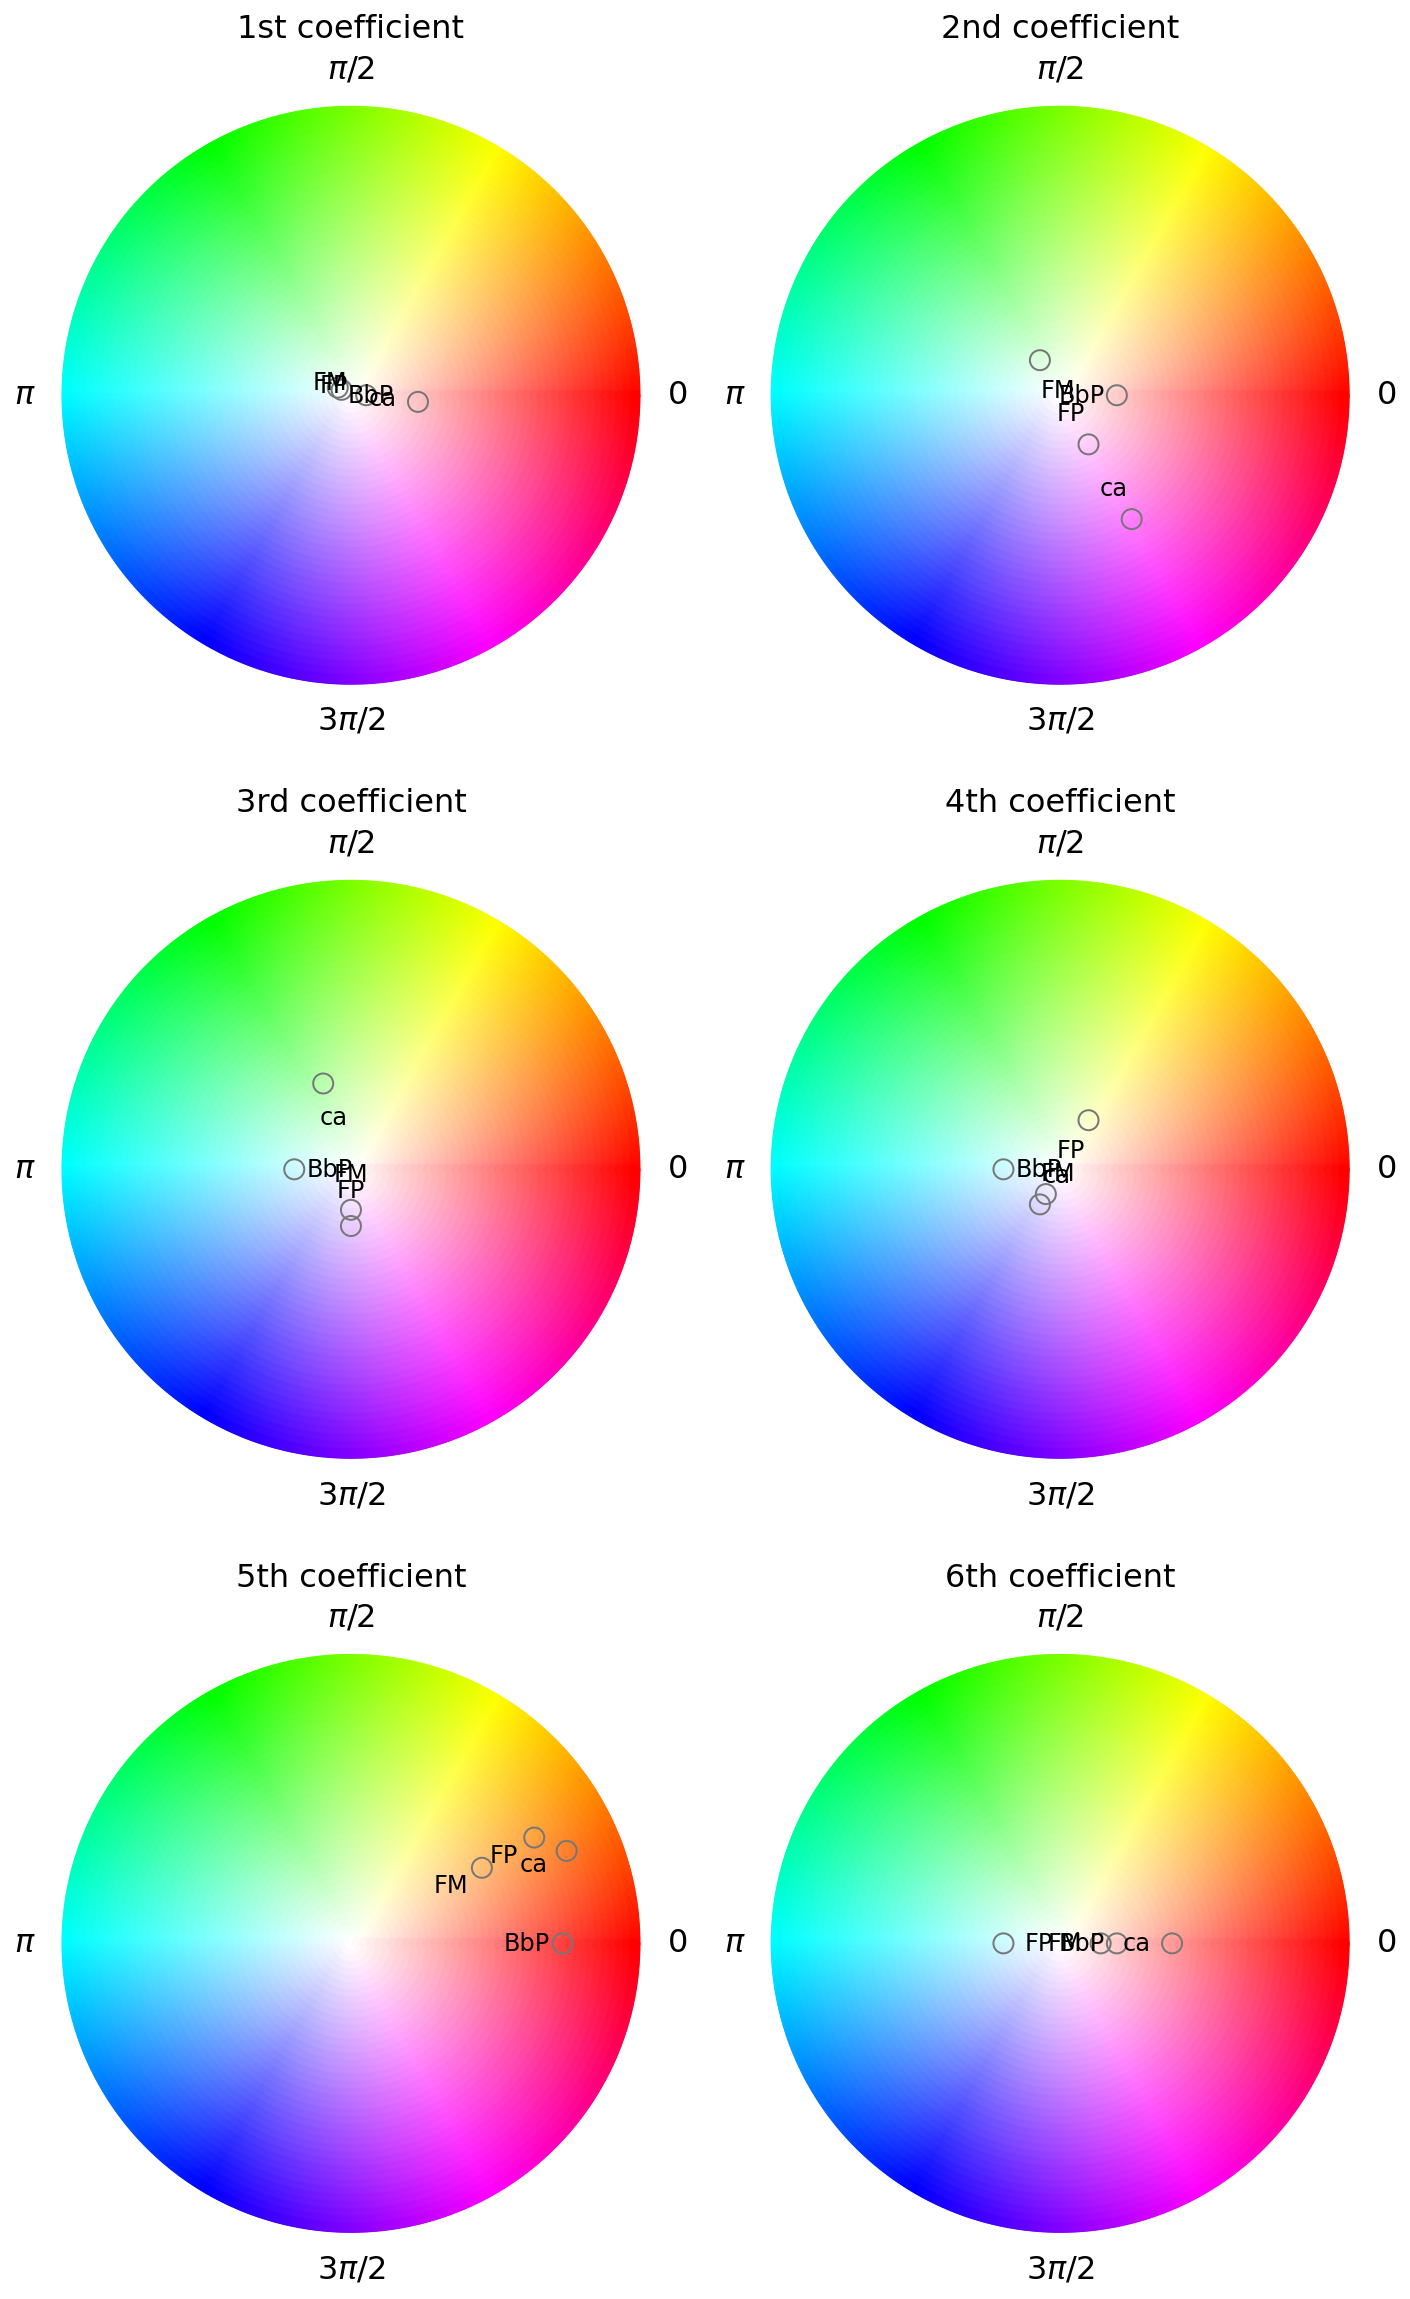

In [121]:
#plot ./reductions/penta\cathedralBbpenta.mid is predicted as Pentatonic and corresponding scale is FPe
test_plot = {'BbP': ([1,0,1,0,0,1,0,1,0,0,1,0], [0]),
             'FP': ([1,0,1,0,0,1,0,1,0,1,0,0], [0]),
             'FM':([1,0,1,0,1,1,0,1,0,1,1,0], [0])}

test_plot['ca'] = (np.sum(produce_pitch_class_matrix_from_filename("./reductions/penta\cathedralBbpenta.mid", aw_size=1),axis=0),[0])
legend_decomposition(test_plot, width=10)    

In [122]:
test_plot

{'BbP': ([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0], [0]),
 'FP': ([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0], [0]),
 'FM': ([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0], [0]),
 'ca': (array([33.66666667,  0.        , 33.66666667,  0.        ,  0.        ,
          0.        ,  0.        , 34.        ,  0.        ,  0.        ,
         11.        ,  0.        ]),
  [0])}

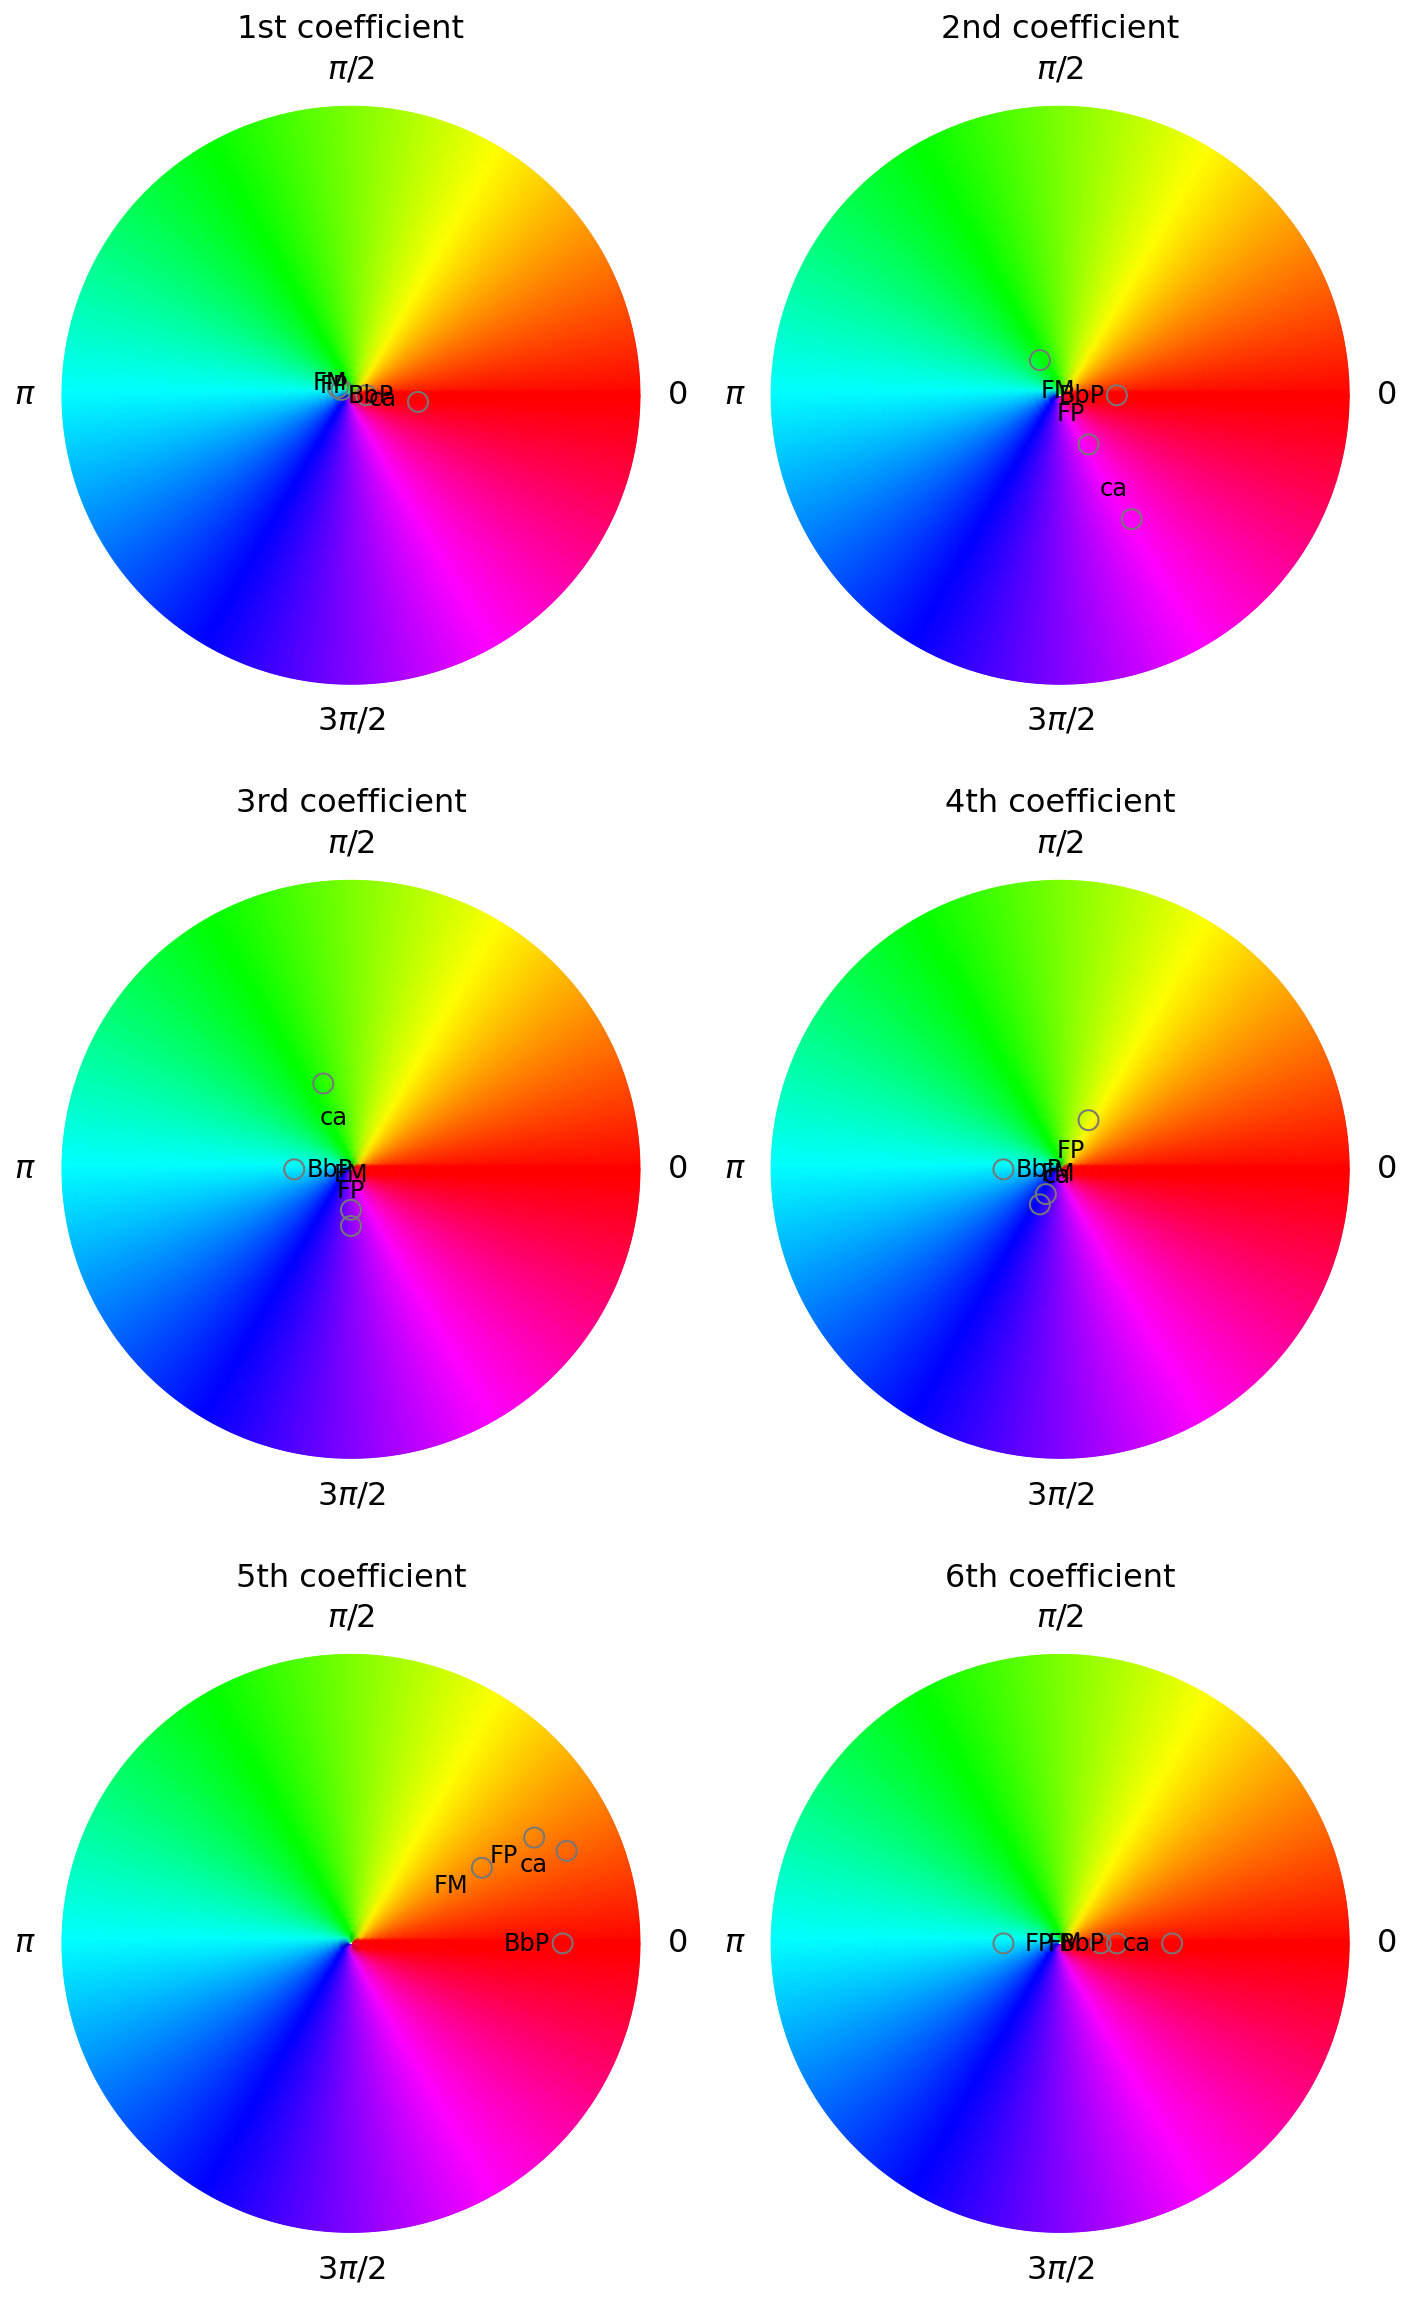

In [126]:
#plot ./reductions/penta\cathedralBbpenta.mid is predicted as Pentatonic and corresponding scale is FPe
test_plot = {'BbP': ([1,0,1,0,0,1,0,1,0,0,1,0], [0]),
             'FP': ([1,0,1,0,0,1,0,1,0,1,0,0], [0]),
             'FM':([1,0,1,0,1,1,0,1,0,1,1,0], [0])}

test_plot['ca'] = (np.mean(produce_pitch_class_matrix_from_filename("./reductions/penta\cathedralBbpenta.mid", aw_size=1),axis=0),[0])
legend_decomposition(test_plot, width=10, ignore_magnitude=True)    

In [110]:
# based on actual angle?
tag_angle={}
for key in scales.items():
    fourier_mat = apply_dft_to_pitch_class_matrix([key[1][0]])
    top_coefficients = fourier_mat[fourier_mat.shape[0]-1][fourier_mat.shape[1]-1][1:]
    phase = np.angle(top_coefficients)
    tag_angle[key[0]] = (phase[4],[phase[1],phase[3],phase[5]])

In [109]:
tag_angle_rad = [values[1] for values in tag_angle.values()]
tag_angle_rad

[[1.0471975511965979, 2.0943951023931957, -3.141592653589793],
 [0.0, 0.0, 0.0],
 [-1.0471975511965979, -2.0943951023931957, 3.141592653589793],
 [-2.0943951023931953, 2.0943951023931957, 5.551115123125784e-17],
 [3.141592653589793, 0.0, 3.141592653589793],
 [2.0943951023931953, -2.0943951023931957, -5.551115123125784e-17],
 [1.0471975511965979, 2.0943951023931957, -3.141592653589793],
 [0.0, 0.0, 0.0],
 [-1.0471975511965979, -2.0943951023931957, 3.141592653589793],
 [-2.0943951023931953, 2.0943951023931957, 5.551115123125784e-17],
 [3.141592653589793, 0.0, 3.141592653589793],
 [2.0943951023931953, -2.0943951023931957, -5.551115123125784e-17],
 [-2.0943951023931953, -1.0471975511965976, 5.551115123125784e-17],
 [3.141592653589793, 3.141592653589793, 3.141592653589793],
 [2.0943951023931953, 1.0471975511965976, -5.551115123125784e-17],
 [1.0471975511965979, -1.0471975511965976, -3.141592653589793],
 [0.0, 3.141592653589793, 0.0],
 [-1.0471975511965979, 1.0471975511965976, 3.141592653589

In [116]:
# testing
dia_penta = {0:"Diatonic",1:"Pentatonic"}
for penta in penta_reductions:
    candidates = [] # candidate scales for current piece
    full = produce_pitch_class_matrix_from_filename(penta, aw_size=1)
    fourier_mat = apply_dft_to_pitch_class_matrix(full)
    top_coefficients = fourier_mat[fourier_mat.shape[0]-1][fourier_mat.shape[1]-1][1:]
    
    phase = np.angle(top_coefficients)
    
    phase5 = phase[4]
    interested_phase = np.array([phase[1],phase[3],phase[5]])
    
    # check phase in 5th coefficient and narrow down to penta/dia
    print(phase5, interested_phase)
    ind = np.argmin(np.abs(phase5-np.array(phase5_tag)[0:12])) # index of the diatonic, +12 -> index of pentatonic
    candidates.append(distance.euclidean(interested_phase, tag_angle_rad[ind]))
    candidates.append(distance.euclidean(interested_phase, tag_angle_rad[ind+12]))
    
    if(np.argmin(candidates)==1):
        ind += 12
    
    print(penta, "is", dia_penta[np.argmin(candidates)], "and corresponding scale is", list(tag)[ind])


0.40499739713580596 [-1.04719755e+00 -2.09439510e+00  1.15196073e-16]
./reductions/penta\cathedralBbpenta.mid is Diatonic and corresponding scale is FM
-2.601621359094327 [-1.18954220e+00  1.04816141e+00  4.14322361e-17]
./reductions/penta\cathedralBmajpenta.mid is Pentatonic and corresponding scale is BPe
1.0973536989246142 [-2.08793232e+00 -3.07350708e+00  7.79966808e-17]
./reductions/penta\cathedralGpenta.mid is Pentatonic and corresponding scale is CPe
-2.8910567977884774 [ 2.99708204e-01  8.10293913e-01 -7.25492274e-17]
./reductions/penta\pagodesBmajpenta.mid is Diatonic and corresponding scale is BM
-1.0891505960544001 [ 4.27669082e-01 -1.43834173e+00 -1.94289029e-16]
./reductions/penta\prelude5Abpenta.mid is Pentatonic and corresponding scale is AbPe
-1.3105535290168078 [-2.96309103 -0.17850162  3.14159265]
./reductions/penta\prelude5Ebpenta.mid is Diatonic and corresponding scale is Cs
-2.1996937224809376 [-2.73404870e-01 -1.73308265e+00  3.70074342e-17]
./reductions/penta\Prél

In [117]:
# testing
dia_penta = {0:"Diatonic",1:"Pentatonic"}
for dia in dia_reductions:
    candidates = [] # candidate scales for current piece
    full = produce_pitch_class_matrix_from_filename(dia, aw_size=1)
    fourier_mat = apply_dft_to_pitch_class_matrix(full)
    top_coefficients = fourier_mat[fourier_mat.shape[0]-1][fourier_mat.shape[1]-1][1:]
    
    phase = np.angle(top_coefficients)
    
    phase5 = phase[4]
    interested_phase = np.array([phase[1],phase[3],phase[5]])
    
    # check phase in 5th coefficient and narrow down to penta/dia
    print(phase5, interested_phase)
    ind = np.argmin(np.abs(phase5-np.array(phase5_tag)[0:12])) # index of the diatonic, +12 -> index of pentatonic
    candidates.append(distance.euclidean(interested_phase, tag_angle_rad[ind]))
    candidates.append(distance.euclidean(interested_phase, tag_angle_rad[ind+12]))
    
    if(np.argmin(candidates)==1):
        ind += 12
    
    print(dia, "is", dia_penta[np.argmin(candidates)], "and corresponding scale is", list(tag)[ind])


-2.96813346578815 [-0.09825459 -0.15617687  3.14159265]
./reductions/diatonic\bergpassepiedcodaF#dorian.mid is Pentatonic and corresponding scale is BPe
1.3974761432645773 [ 2.05075768e+00 -4.62653584e-01 -7.19854284e-16]
./reductions/diatonic\bergprelude20Amin.mid is Diatonic and corresponding scale is GM
-2.1216702928259887 [-2.66309942e+00  2.71809033e+00  2.84046056e-17]
./reductions/diatonic\cathedralG#aeolian.mid is Pentatonic and corresponding scale is FsPe
-2.6021501936706515 [-1.845429    0.06788508  3.14159265]
./reductions/diatonic\cathedralG#phrygian.mid is Pentatonic and corresponding scale is BPe
0.8308062163041433 [ 2.05898893e-01 -5.38456187e-03 -2.95122576e-17]
./reductions/diatonic\cathedralplaningCmaj.mid is Pentatonic and corresponding scale is CPe
0.7646020729073607 [ 3.17616457e-01 -2.86843189e-01 -6.89924308e-17]
./reductions/diatonic\childrens_corner_1cmaj.mid is Diatonic and corresponding scale is FM
-2.4753332738393903 [-5.67276224e-02 -3.56199584e-01  9.62621

Results are worse with actual angle...

How color mapping works...

Predict by votes of scales in the surface.

In [148]:
dic = {0:'single tone', 1:'tritone', 2:'major/minor triad', 3:'augmented triad', 4:'M7 chord', 5:'m7 chord',
      6:'half dim chord', 7:'dim chord', 8:'pentatonic scale', 9:'guidos hexachord', 10:'wholetone scale',
       11:'6 chromatic tones', 12:'diatonic scale', 13:'3 chromatic tritones', 14:'hexatonic scale', 
       15:'octatonic scale', 16:'all tones'}

orig_coeffs = [[1,1,1,1,1,1], [0,1,0,1,0,1], [0.17, 0.33, 0.75, 0.58, 0.64, 0.33], 
               [0,0,1,0,0,1], [0.13, 0.43, 0.71, 0.25, 0.48, 0],
               [0.18, 0, 0.5, 0.5, 0.68, 0], [0.13, 0.25, 0.35, 0.66, 0.48, 0.5],
               [0,0,0,1,0,0], [0.054, 0.2, 0.2, 0.2, 0.75, 0.2],
               [0.17, 0, 0.24, 0, 0.64, 0], [0,0,0,0,0,1],
               [0.64, 0, 0.24, 0, 0.17, 0], [0.038, 0.14, 0.14, 0.14, 0.53, 0.14],
               [0, 0.64, 0,0,0, 0.33], [0,0,0.71,0,0,0],
               [0,0,0,0.5,0,0], [0,0,0,0,0,0]]

def predict_scale_v1(score, aw_size_input, hor_ratio=(0,1)):

    scales = [] # store index of the closest scale for each cell
    
    arr1 = produce_pitch_class_matrix_from_filename(score, aw_size=aw_size_input)
    dft = np.abs(apply_dft_to_pitch_class_matrix(arr1, build_utm=False)) #return value of shape N*7 all magnitude!!
    
    selected_dft = dft[int(dft.shape[0] * hor_ratio[0]):int(dft.shape[0] * hor_ratio[1])-1]
    
    #for every cell, decide its scale
    for i in range(selected_dft.shape[0]):
        dist = [] 
        for j in range(np.array(orig_coeffs).shape[0]):
            dist.append(distance.euclidean(selected_dft[i][1:]/selected_dft[i][0], orig_coeffs[j]))
        #dist.append(distance.euclidean(selected_dft[i][1:]/selected_dft[i][0], orig_coeffs[12]))
        #dist.append(distance.euclidean(selected_dft[i][1:]/selected_dft[i][0], orig_coeffs[8]))
        scales.append(np.argmin(dist))
        
    counts = np.bincount(scales)
    
    #ind=8
    #if(np.argmax(counts)==0):
    #    ind = 12
        
    print(score, "is predicted as", dic[np.argmax(counts)])
    #print(score, "is predicted as", dic[ind])

In [149]:
predict_scale_v1("./reductions/penta\cathedralBbpenta.mid",1.0)

./reductions/penta\cathedralBbpenta.mid is predicted as pentatonic scale


In [150]:
# testing
for penta in penta_reductions:
    predict_scale_v1(penta,1.0)

./reductions/penta\cathedralBbpenta.mid is predicted as pentatonic scale
./reductions/penta\cathedralBmajpenta.mid is predicted as pentatonic scale
./reductions/penta\cathedralGpenta.mid is predicted as major/minor triad
./reductions/penta\pagodesBmajpenta.mid is predicted as m7 chord
./reductions/penta\prelude5Abpenta.mid is predicted as major/minor triad
./reductions/penta\prelude5Ebpenta.mid is predicted as pentatonic scale
./reductions/penta\Prélude VIIIpenta.mid is predicted as major/minor triad
./reductions/penta\Prélude VIIIpenta1.mid is predicted as major/minor triad
./reductions/penta\Prélude VIIIpenta2.mid is predicted as major/minor triad
./reductions/penta\Voiles pentatonic reducted.mid is predicted as pentatonic scale
./reductions/penta\Voiles-bluesmajor-japanes yo penta scale.mid is predicted as single tone
./reductions/penta\VoilesEbminpenta-notfound.mid is predicted as pentatonic scale


In [151]:
for dia in dia_reductions:
    try:
        predict_scale_v1(dia,1.0)
    except:
        print("error in processing", dia)

<ipython-input-148-9168e65cd1a0>:28: RuntimeWarning: invalid value encountered in true_divide
  dist.append(distance.euclidean(selected_dft[i][1:]/selected_dft[i][0], orig_coeffs[j]))


error in processing ./reductions/diatonic\bergpassepiedcodaF#dorian.mid
./reductions/diatonic\bergprelude20Amin.mid is predicted as major/minor triad
./reductions/diatonic\cathedralG#aeolian.mid is predicted as single tone
./reductions/diatonic\cathedralG#phrygian.mid is predicted as pentatonic scale
./reductions/diatonic\cathedralplaningCmaj.mid is predicted as major/minor triad
./reductions/diatonic\childrens_corner_1cmaj.mid is predicted as major/minor triad
./reductions/diatonic\estamp2_109.mid is predicted as major/minor triad
./reductions/diatonic\estampes2_66.mid is predicted as pentatonic scale
./reductions/diatonic\menuet73Eflatmaj.mid is predicted as major/minor triad
./reductions/diatonic\menuet80Amaj.mid is predicted as half dim chord
error in processing ./reductions/diatonic\menuet97Amin.mid
./reductions/diatonic\prelude5Abmaj.mid is predicted as major/minor triad


In [140]:
scores = glob('./scores/*.mid')
for score in scores:
    try:
        predict_scale_v1(score, 10.0)
    except:
        print('could not predict', score)

./scores\childrens_corner_1_(c)oguri.mid is predicted as diatonic scale
./scores\childrens_corner_2_(c)oguri.mid is predicted as half dim chord
./scores\childrens_corner_3_(c)oguri.mid is predicted as half dim chord
./scores\childrens_corner_4_(c)oguri.mid is predicted as half dim chord
./scores\childrens_corner_5_(c)oguri.mid is predicted as major/minor triad
./scores\childrens_corner_6_(c)dery.mid is predicted as diatonic scale
./scores\Debussy_-_Suite_Bergamasque_-_I._Prelude.mid is predicted as diatonic scale
./scores\Debussy_-_Suite_Bergamasque_-_II._Menuet.mid is predicted as diatonic scale
./scores\Debussy_-_Suite_Bergamasque_-_III._Clair_de_Lune.mid is predicted as diatonic scale
./scores\Debussy_-_Suite_Bergamasque_-_VI._Passepied.mid is predicted as pentatonic scale
./scores\debussy_estampes_1_(c)galimberti.mid is predicted as pentatonic scale
./scores\Debussy_Prelude_Book_2_No_10_Canope.mid is predicted as diatonic scale
./scores\Debussy_Prelude_Book_2_No_11_-_Les_tierces_al

In [152]:
def predict_scale_v2(score, aw_size_input, ver_ratio=(0,1)):
    scales = [] # store index of the closest scale for each cell
    
    arr1 = produce_pitch_class_matrix_from_filename(score, aw_size=aw_size_input)
    dft = np.abs(apply_dft_to_pitch_class_matrix(arr1)) #return value of shape N*N*7 all magnitude!!
    
    selected_dft = dft[int(dft.shape[0] * ver_ratio[0]):int(dft.shape[0] * ver_ratio[1])-1]
    
    #for every cell, decide its scale
    for i in range(selected_dft.shape[0]):
        for j in range(selected_dft.shape[1]):
            if(np.sum(selected_dft[i][j])==0):
                continue
            dist = [] 
            for k in range(np.array(orig_coeffs).shape[0]):
                dist.append(distance.euclidean(selected_dft[i][j][1:]/selected_dft[i][j][0], orig_coeffs[k]))
            scales.append(np.argmin(dist))
        
    counts = np.bincount(scales)
    print(score, "is predicted as", dic[np.argmax(counts)])

In [153]:
# testing
for penta in penta_reductions:
    predict_scale_v2(penta,1.0)

./reductions/penta\cathedralBbpenta.mid is predicted as pentatonic scale
./reductions/penta\cathedralBmajpenta.mid is predicted as m7 chord
./reductions/penta\cathedralGpenta.mid is predicted as pentatonic scale
./reductions/penta\pagodesBmajpenta.mid is predicted as m7 chord
./reductions/penta\prelude5Abpenta.mid is predicted as diatonic scale
./reductions/penta\prelude5Ebpenta.mid is predicted as pentatonic scale
./reductions/penta\Prélude VIIIpenta.mid is predicted as major/minor triad
./reductions/penta\Prélude VIIIpenta1.mid is predicted as pentatonic scale
./reductions/penta\Prélude VIIIpenta2.mid is predicted as pentatonic scale
./reductions/penta\Voiles pentatonic reducted.mid is predicted as pentatonic scale
./reductions/penta\Voiles-bluesmajor-japanes yo penta scale.mid is predicted as pentatonic scale
./reductions/penta\VoilesEbminpenta-notfound.mid is predicted as pentatonic scale


In [154]:
for dia in dia_reductions:
    try:
        predict_scale_v2(dia,1.0)
    except:
        print("error in processing", dia)

./reductions/diatonic\bergpassepiedcodaF#dorian.mid is predicted as pentatonic scale
./reductions/diatonic\bergprelude20Amin.mid is predicted as diatonic scale
./reductions/diatonic\cathedralG#aeolian.mid is predicted as major/minor triad
./reductions/diatonic\cathedralG#phrygian.mid is predicted as pentatonic scale
./reductions/diatonic\cathedralplaningCmaj.mid is predicted as diatonic scale
./reductions/diatonic\childrens_corner_1cmaj.mid is predicted as M7 chord
./reductions/diatonic\estamp2_109.mid is predicted as pentatonic scale
./reductions/diatonic\estampes2_66.mid is predicted as M7 chord
./reductions/diatonic\menuet73Eflatmaj.mid is predicted as diatonic scale
./reductions/diatonic\menuet80Amaj.mid is predicted as diatonic scale
./reductions/diatonic\menuet97Amin.mid is predicted as M7 chord
./reductions/diatonic\prelude5Abmaj.mid is predicted as pentatonic scale
